In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
import sqlite3

In [3]:
con = sqlite3.connect(r"password_data.sqlite")

In [4]:
data = pd.read_sql_query("SELECT * FROM Users", con)

In [5]:
data.shape

(100000, 3)

In [6]:
data.head(3)

,index,password,strength
0,0,zxe870819,1
1,1,xw46454nr23l,1
2,2,soporte13,1


In [7]:
data.columns

Index(['index', 'password', 'strength'], dtype='object')

In [8]:
data.drop('index', axis = 1, inplace = True)

In [9]:
data.head(3)

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1


In [10]:
data.duplicated().sum()

0

In [11]:
data.isnull().any().sum()

0

In [12]:
data.dtypes

password    object
strength     int64
dtype: object

In [13]:
data["strength"].unique()

array([1, 2, 0], dtype=int64)

In [14]:
data.columns

Index(['password', 'strength'], dtype='object')

In [15]:
type(data['password'][0])

str

In [16]:
data['password'].str.isnumeric().sum()

26

In [17]:
data[data['password'].str.isnumeric()].shape

(26, 2)

In [18]:
data['password'].str.isupper().sum()

1506

In [19]:
data['password'].str.isalpha().sum()

50

In [20]:
data['password'].str.istitle().sum()

932

In [21]:
data[data['password'].str.isupper()]

,password,strength
115,EYT63119,1
273,INSPIRON6,1
338,1A2S3D4F,1
367,13269123A,1
373,YAMAZAKI82,1
...,...,...
99590,V13000993J,1
99692,65925013ABC,1
99784,01EDD055,1
99893,1UPONYOU,1


In [22]:
data['password'].str.isalpha().sum()

50

In [23]:
data['password'].str.isalnum().sum()

97203

In [24]:
data['password'].str.istitle().sum()

932

In [25]:
import string

In [26]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [27]:
def find_semantics(row):
    for char in row:
        if char in string.punctuation:
            return 1
        else:
            pass

In [28]:
data['password'].apply(find_semantics).sum()

2663.0

In [29]:
data["length"] = data['password'].str.len()

In [30]:
def freq_lowercase(row):
    return len([char for char in row if char.islower()])/len(row)

In [31]:
def freq_uppercase(row):
    return len([char for char in row if char.isupper()])/len(row)

In [32]:
def freq_numerical_case(row):
    return len([char for char in row if char.isdigit()])/len(row)

In [33]:
data['password'].apply(freq_lowercase)

0        0.333333
1        0.416667
2        0.777778
3        0.782609
4        0.625000
           ...   
99995    0.700000
99996    0.800000
99997    0.777778
99998    0.666667
99999    0.727273
Name: password, Length: 100000, dtype: float64

In [34]:
data["lowercase_freq"] = np.round(data['password'].apply(freq_lowercase), 3)

data["uppercase_freq"] = np.round(data['password'].apply(freq_uppercase), 3)

data["digit_freq"] = np.round(data['password'].apply(freq_numerical_case), 3)

In [35]:
data.head(2)

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq
0,zxe870819,1,9,0.333,0.0,0.667
1,xw46454nr23l,1,12,0.417,0.0,0.583


In [36]:
def freq_special_case(row):
    special_chars = []
    for char in row:
        if not char.isalpha() and not char.isdigit():
            special_chars.append(char)
    return len(special_chars)

In [37]:
data["special_char_freq"] = np.round(data['password'].apply(freq_special_case), 3)

In [38]:
data.head(5)

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0
1,xw46454nr23l,1,12,0.417,0.0,0.583,0
2,soporte13,1,9,0.778,0.0,0.222,0
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,1
4,c443balg,1,8,0.625,0.0,0.375,0


In [39]:
data["special_char_freq"] = data["special_char_freq"]/data["length"]

In [40]:
data.head(5)

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.000000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000000
2,soporte13,1,9,0.778,0.0,0.222,0.000000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043478
4,c443balg,1,8,0.625,0.0,0.375,0.000000


In [41]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

In [42]:
data[['length', 'strength']].groupby(['strength']).agg(['min', 'max', 'mean', 'median'])

length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0

In [43]:
cols = ['length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq']

for col in cols:
    print(col)
    print(data[[col , 'strength']].groupby(['strength']).agg(["min", "max" , "mean" , "median"]))
    print('\n')

length
         length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0


lowercase_freq
         lowercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.708050  0.714
1                   0.0  0.923  0.630067  0.667
2                   0.0  0.917  0.424679  0.400


uppercase_freq
         uppercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.012872  0.000
1                   0.0  0.923  0.007915  0.000
2                   0.0  0.889  0.367633  0.429


digit_freq
         digit_freq                        
                min    max      mean median
strength                                   
0   

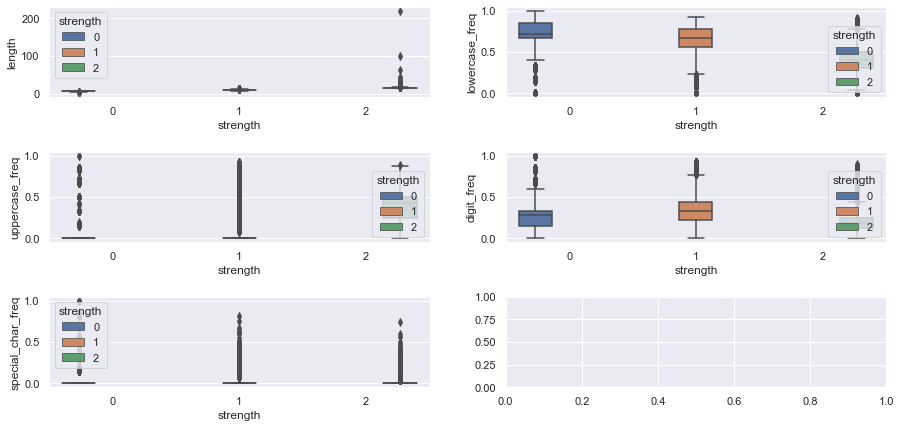

In [44]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize = (15,7))

sns.boxplot(x = "strength", y = "length", hue = "strength", ax = ax1, data = data)
sns.boxplot(x = "strength", y = "lowercase_freq", hue = "strength", ax = ax2, data = data)
sns.boxplot(x = "strength", y = "uppercase_freq", hue = "strength", ax = ax3, data = data)
sns.boxplot(x = "strength", y = "digit_freq", hue = "strength", ax = ax4, data = data)
sns.boxplot(x = "strength", y = "special_char_freq", hue = "strength", ax = ax5, data = data)

plt.subplots_adjust(hspace = 0.6)

In [45]:
def get_dist(data, feature):
    plt.figure(figsize = (10,8))
    plt.subplot(1, 2, 1)
    sns.violinplot(x = 'strength', y = feature, data = data)
    
    plt.subplot(1, 2, 2)
    sns.distplot(data[data['strength'] == 0][feature], color = "red", label = "0", hist = False)
    sns.distplot(data[data['strength'] == 1][feature], color = "blue", label = "1", hist = False)
    sns.distplot(data[data['strength'] == 2][feature], color = "orange", label = "2", hist = False)
    
    plt.legend()
    plt.show()

In [46]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

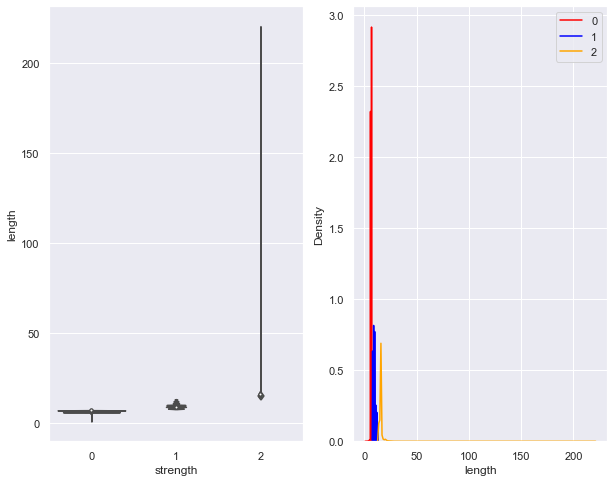

In [47]:
get_dist(data, "length")

In [48]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

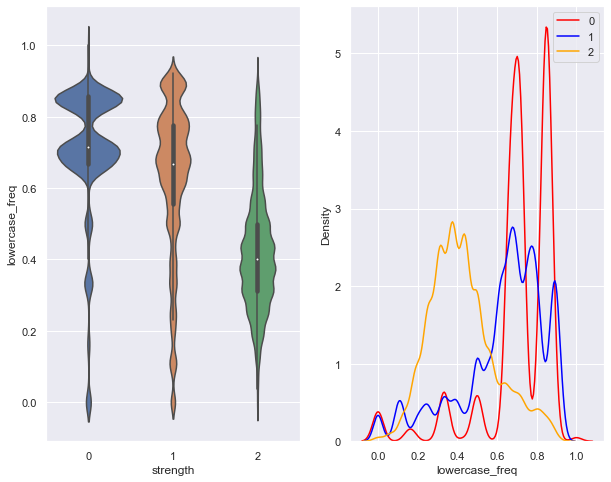

In [49]:
get_dist(data, "lowercase_freq")

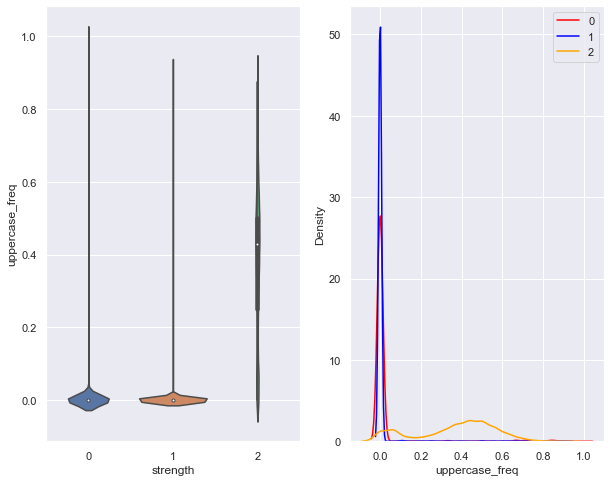

In [50]:
get_dist(data, "uppercase_freq")

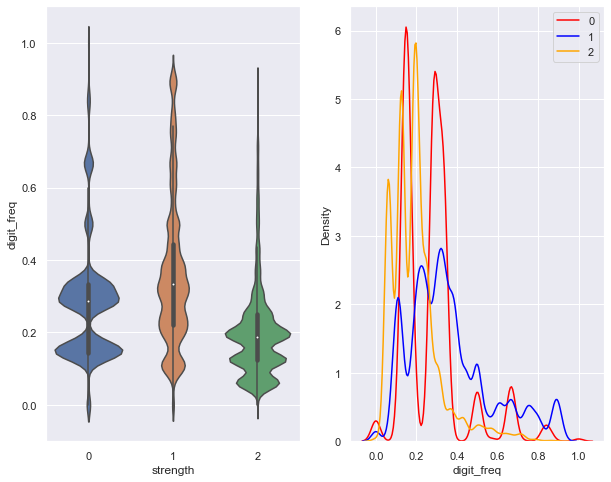

In [51]:
get_dist(data, "digit_freq")

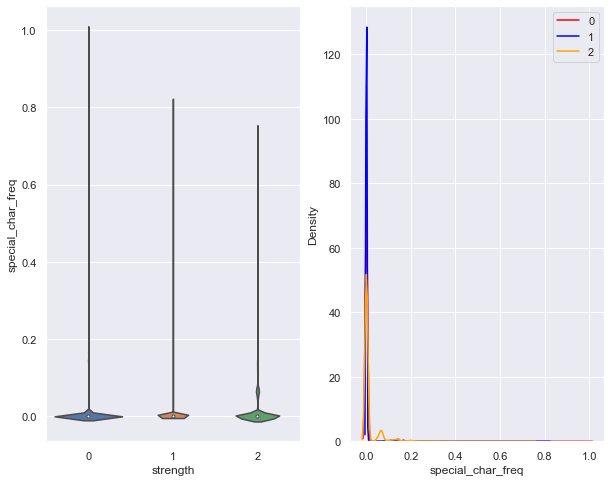

In [52]:
get_dist(data, "special_char_freq")

In [53]:
data.head(4)

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.000000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000000
2,soporte13,1,9,0.778,0.0,0.222,0.000000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043478


In [54]:
data_frame = data.sample(frac = 1)

In [55]:
data_frame

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
10976,nHbHTqTk3OAXtFQd,2,16,0.375,0.562,0.062,0.0
87946,osezigi448,1,10,0.700,0.000,0.300,0.0
58159,polakan77GATILLO,2,16,0.438,0.438,0.125,0.0
83488,mvwkiys807,1,10,0.700,0.000,0.300,0.0
63491,paintball1,1,10,0.900,0.000,0.100,0.0
...,...,...,...,...,...,...,...
8230,XANGA123,1,8,0.000,0.625,0.375,0.0
62202,mayorpass123,1,12,0.750,0.000,0.250,0.0
94515,senev971,1,8,0.625,0.000,0.375,0.0
80196,golf121995,1,10,0.400,0.000,0.600,0.0


In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [57]:
vectorizer = TfidfVectorizer(analyzer = 'char')

In [58]:
x = list(data_frame["password"])

In [59]:
X = vectorizer.fit_transform(x)

In [60]:
X.shape

(100000, 99)

In [61]:
data_frame["password"].shape

(100000,)

In [62]:
X.toarray()[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.16917574, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.12573196, 0.21077445, 0.        ,
       0.18937828, 0.        , 0.22980042, 0.        , 0.40586123,
       0.        , 0.        , 0.19469488, 0.        , 0.        ,
       0.16163308, 0.15449528, 0.        , 0.4763055 , 0.        ,
       0.        , 0.53489294, 0.        , 0.        , 0.        ,
       0.2384784 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [63]:
len(vectorizer.get_feature_names_out())

99

In [64]:
df_2 = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names_out())

In [65]:
df_2

,,,,,,,,,!,#,...,ñ,ó,õ,ö,÷,ú,ü,ý,þ,›
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

In [67]:
df_2["length"] = data_frame["length"]
df_2["lowercase_freq"] = data_frame["lowercase_freq"]

In [68]:
df_2

,,,,,,,,,!,#,...,õ,ö,÷,ú,ü,ý,þ,›,length,lowercase_freq
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.333
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,0.417
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23,0.783
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.700
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.800
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.667


In [69]:
#for creating the ML model, considering the first 80k rows of data as training data and the remaining as testing data
from sklearn.model_selection import train_test_split

In [70]:
y = data_frame["strength"]

In [71]:
X_train, X_test, y_train, y_test = train_test_split(df_2, y, test_size = 0.20)

In [72]:
X_train.shape

(80000, 101)

In [73]:
y_train.shape

(80000,)

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
clf = LogisticRegression(multi_class = "multinomial")

In [76]:
clf.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [77]:
y_pred = clf.predict(X_test)

In [78]:
y_pred

array([2, 1, 2, ..., 1, 1, 2], dtype=int64)

In [79]:
from collections import Counter

In [80]:
Counter(y_pred)

Counter({2: 1547, 1: 17162, 0: 1291})

In [81]:
password = "%@123abcd"

In [82]:
sample_array = np.array([password])

In [83]:
sample_matrix = vectorizer.transform(sample_array)

In [84]:
sample_matrix.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.71897928, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.14344586, 0.1659599 , 0.18587581, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.48741481, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.13814351, 0.23158091, 0.21637656,
        0.20807263, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [85]:
sample_matrix.toarray().shape

(1, 99)

In [86]:
password

'%@123abcd'

In [87]:
len(password)

9

In [88]:
[char for char in password if char.islower()]

['a', 'b', 'c', 'd']

In [89]:
#normalised value
len([char for char in password if char.islower()])/len(password)

0.4444444444444444

In [90]:
np.append(sample_matrix.toarray(), (9, 0.444))

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.71897928, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.14344586, 0.1659599 , 0.18587581, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.48741481, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.13814351, 0.23158091, 0.21637656,
       0.20807263, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [91]:
np.append(sample_matrix.toarray(), (9, 0.444)).reshape(1, 101).shape

(1, 101)

In [92]:
new_matrix = np.append(sample_matrix.toarray(), (9, 0.444)).reshape(1, 101)

In [93]:
clf.predict(new_matrix)

array([0], dtype=int64)

In [98]:
#defining a function which predicts password strength
def predict():
    password = input("Enter password: ")
    sample_array = np.array([password])
    sample_matrix = vectorizer.transform(sample_array)
    
    length_password = len(password)
    length_normalised_lowercase = len([char for char in password if char.islower()])/len(password)
    
    new_matrix_2 = np.append(sample_matrix.toarray(), (length_password, length_normalised_lowercase)).reshape(1, 101)
    result = clf.predict(new_matrix_2)
    
    if result == 0:
        return "Password strength is weak"
    elif result == 1:
        return "Password strength is average"
    else:
        return "Password strength is strong"

In [101]:
predict()

Enter password: jedpvq733!kjdfAAhde


'Password strength is strong'

In [102]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [103]:
accuracy_score(y_test, y_pred)

0.80145

In [104]:
confusion_matrix(y_test, y_pred)

array([[  680,  2008,     0],
       [  550, 14003,   201],
       [   61,  1151,  1346]], dtype=int64)

In [105]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.25      0.34      2688
           1       0.82      0.95      0.88     14754
           2       0.87      0.53      0.66      2558

    accuracy                           0.80     20000
   macro avg       0.74      0.58      0.63     20000
weighted avg       0.78      0.80      0.78     20000

